# Question 5
## Clustering

### Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

### Read csv file

In [14]:
df = pd.read_csv("Mall_Customers.csv")

#### We have to encode the Gender feature into binary numbers. Also we do not want the CustomerID feature because it is uniqe for everyone and does not give us anything usefull for our clustering.

In [15]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

df['Cluster'] = kmeans.labels_

#### We plot the Income and Spending score with the clusters in colors.

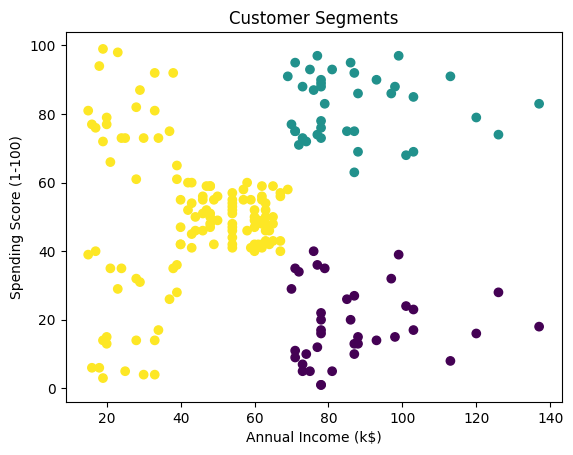

In [16]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

#### Also I plot the PCA of the data because we have more than two features and it is kind of hard to visualize it.

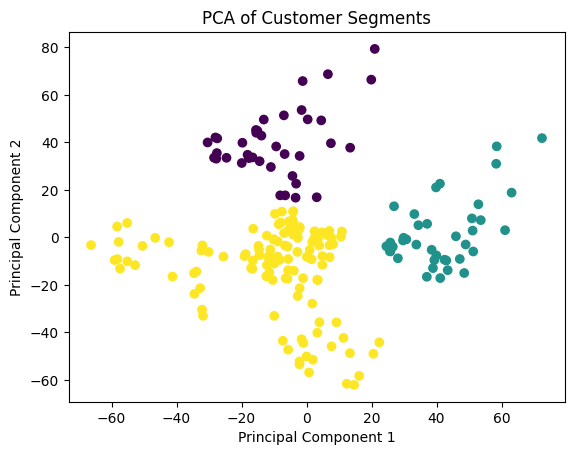

In [17]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Segments')
plt.show()


### Finding best hyperparameters (k)

This method helps you determine the optimal number of clusters by plotting the sum of squared distances from each point to its assigned cluster center (also known as inertia) against the number of clusters. The "elbow" point, where the decrease in inertia slows down, indicates the optimal number of clusters. We can see in the below plot the k = 6 can be our elbow point.

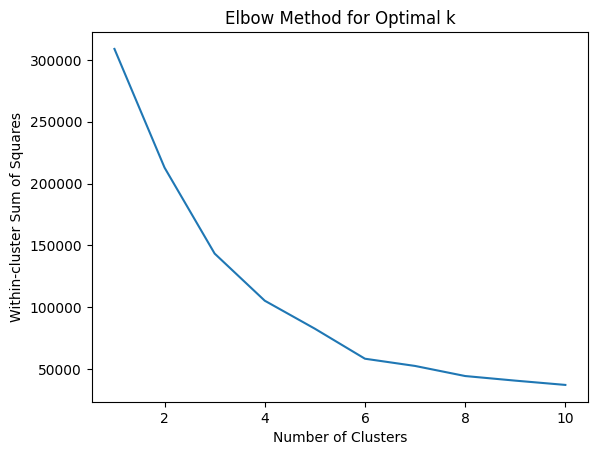

In [18]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()


The silhouette score measures how similar each point is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters. You can see that in the plot below the k = 6 has the max score, thus it is the best k.

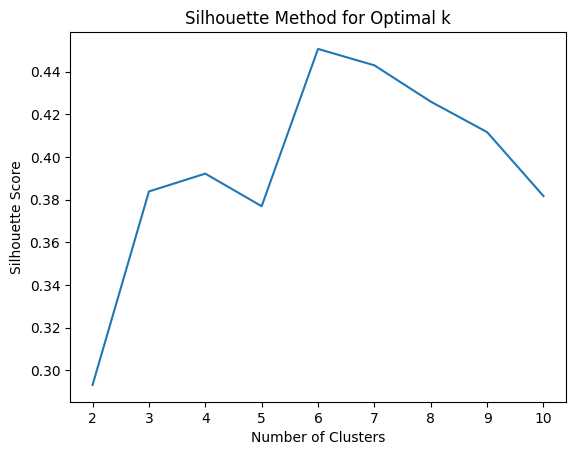

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()
